# <center>Challenge 0<center>

<p>Team Name: Regular
<p>Student Names: Alameen Adeku, Harper Laskie, Sirjana Acharya

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PART I

## Prepare Data

<b>A. Create a data set D with 100 data points with the following attributes (features) as such:</b><br>
seed = 0<br>
a1 is from a normal distribution N(mean=20,var=4)<br>
a2 is from a uniform distribution U(min=14,max=26)<br>

In [4]:
np.random.seed(0)

a1 = np.random.normal(loc=20,scale=2, size = 100)
a2 = np.random.uniform(low=14, high=26, size=100)

D = pd.DataFrame({
    'a1': a1, 'a2': a2
})
print(D)

           a1         a2
0   23.528105  19.086261
1   20.800314  21.276719
2   21.957476  14.230318
3   24.481786  17.618898
4   23.735116  21.922082
..        ...        ...
95  21.413146  23.972581
96  20.021000  21.547782
97  23.571741  24.471808
98  20.253824  17.282504
99  20.803979  23.576562

[100 rows x 2 columns]


x1 = 2*a1<br>
x2 = normal distribution N(mean=40,var=4)<br>
Pr(x1,x2,target) = {(x1, x2, 'P')}, data objects with class positive<br>
P = Rotate(Pr,45), rotate Pr by 45 degrees in counter-clockwise<br>
Nr = Shift(Pr,x1,20), shift in x1-dimension by 20 units towards right, data objects with class negative, where
Nr(x1,x2,target) = {(x1_shifted, x2, 'N')}<br>
N = Rotate(Nr,45), rotate Nr by 45 degrees in counter-clockwise<br>

In [5]:
pi = math.pi
def rotate_points(df, angle):
    x1_new, x2_new = [], []
    for _, row in df.iterrows():
        x1_new.append(row['x1']*math.cos(angle) - row['x2']*math.sin(angle))
        x2_new.append(row['x1']*math.sin(angle) + row['x2']*math.cos(angle))
    
    df = pd.DataFrame({'x1':x1_new, 'x2':x2_new})
    return df

x1 = [i*2 for i in a1]
x2 = np.random.normal(loc=40,scale=2, size = 100)
Pr_target = ['P' for i in range(len(x1))]

Pr = pd.DataFrame({'x1':x1, 'x2':x2, 'target': Pr_target})
# 45 degrees = pi/4 radians
P = rotate_points(Pr,pi/4)
P['target'] = Pr_target
print(P)

          x1         x2 target
0   6.452134  60.095396      P
1   0.167895  58.664278      P
2   3.904482  58.200639      P
3   7.313374  61.931575      P
4   5.926472  61.206574      P
..       ...        ...    ...
95  1.860746  58.704778      P
96 -0.534638  57.162578      P
97  8.972243  57.698709      P
98 -2.407116  59.693582      P
99  0.585322  58.257215      P

[100 rows x 3 columns]


In [6]:
x1_shifted = [i+20 for i in x1]
print('Original x1:', x1)
print('Shifted x1:', x1_shifted)
Nr_target = ['N' for i in range(len(x1))]
Nr = pd.DataFrame({'x1':x1_shifted, 'x2':x2 ,'target': Nr_target})
N = rotate_points(Nr,pi/4)
N['target'] = Nr_target
print('N DataFrame:\n ', N)

Original x1: [np.float64(47.05620938387066), np.float64(41.600628833468896), np.float64(43.91495193642296), np.float64(48.963572796805835), np.float64(47.47023196059987), np.float64(36.09088848049436), np.float64(43.80035367010236), np.float64(39.39457116680921), np.float64(39.58712459282577), np.float64(41.64239400775349), np.float64(40.576174284643514), np.float64(45.8170940278519), np.float64(43.04415090058797), np.float64(40.48670006597131), np.float64(41.7754529309817), np.float64(41.334697309497066), np.float64(45.97631629263042), np.float64(39.179366944936795), np.float64(41.252270806603605), np.float64(36.5836170427931), np.float64(29.788040736663685), np.float64(42.61447438176144), np.float64(43.457744795438025), np.float64(37.03133991837423), np.float64(49.07901849595043), np.float64(34.18253730160494), np.float64(40.18303406920578), np.float64(39.251264599896665), np.float64(46.13111685743383), np.float64(45.87743507960114), np.float64(40.61978970278766), np.float64(41.51265

### Merge Data

Merge P and N into a single set PN. 

In [7]:
PN = pd.concat([P,N], ignore_index=True)
print(PN)

            x1         x2 target
0     6.452134  60.095396      P
1     0.167895  58.664278      P
2     3.904482  58.200639      P
3     7.313374  61.931575      P
4     5.926472  61.206574      P
..         ...        ...    ...
195  16.002882  72.846913      N
196  13.607497  71.304713      N
197  23.114378  71.840844      N
198  11.735020  73.835717      N
199  14.727458  72.399351      N

[200 rows x 3 columns]


# PART II

## Visualize Data
The axis scale should be the same. The class-P and -N data points will in red-circle and blue-triangle, respectively.

Plot Pr and P in the same figure on a separate sub-plots of 1 by 2:

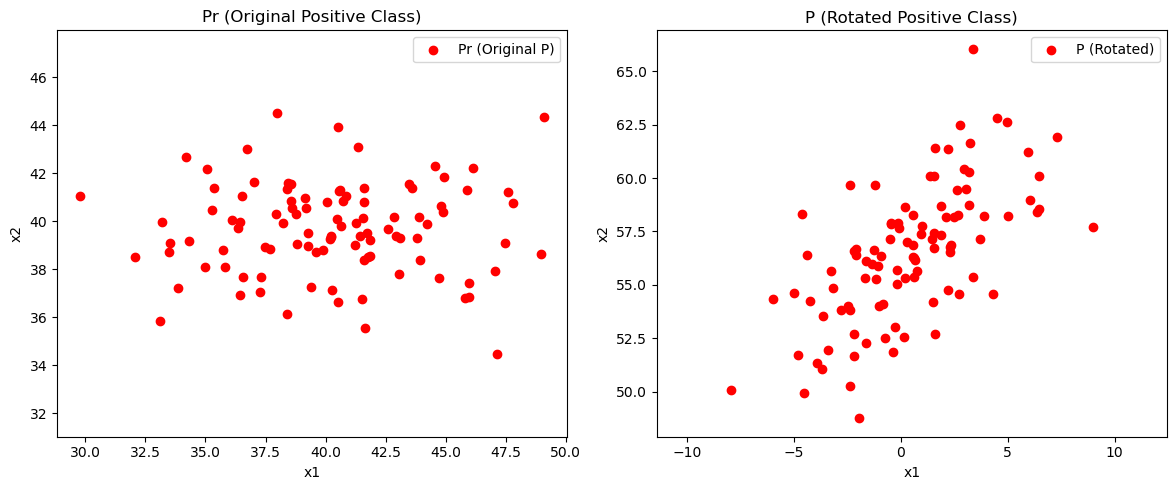

In [8]:
# Create subplots for Pr and P
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Pr
axes[0].scatter(Pr['x1'], Pr['x2'], color='red', marker='o', label='Pr (Original P)')
axes[0].set_title("Pr (Original Positive Class)")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")
axes[0].axis('equal')
axes[0].legend()

# Plot P (rotated)
axes[1].scatter(P['x1'], P['x2'], color='red', marker='o', label='P (Rotated)')
axes[1].set_title("P (Rotated Positive Class)")
axes[1].set_xlabel("x1")
axes[1].set_ylabel("x2")
axes[1].axis('equal')
axes[1].legend()

plt.tight_layout()
plt.show()

Plot Nr and N in the same figure on a separate sub-plots of 1 by 2:

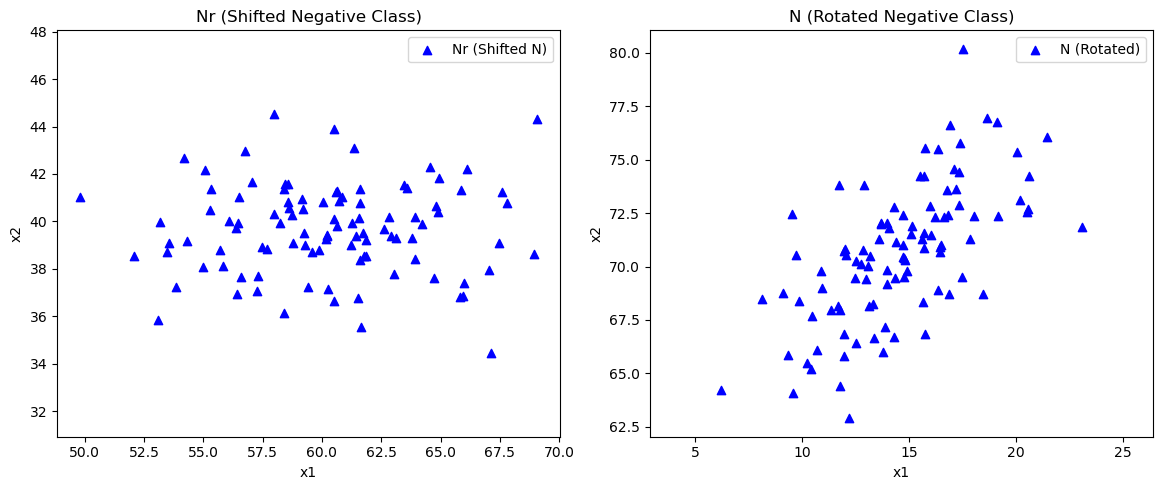

In [9]:
# Create subplots for Nr and N
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Nr
axes[0].scatter(Nr['x1'], Nr['x2'], color='blue', marker='^', label='Nr (Shifted N)')
axes[0].set_title("Nr (Shifted Negative Class)")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")
axes[0].axis('equal')
axes[0].legend()

# Plot N (rotated)
axes[1].scatter(N['x1'], N['x2'], color='blue', marker='^', label='N (Rotated)')
axes[1].set_title("N (Rotated Negative Class)")
axes[1].set_xlabel("x1")
axes[1].set_ylabel("x2")
axes[1].axis('equal')
axes[1].legend()

plt.tight_layout()
plt.show()

Plot {PN}:

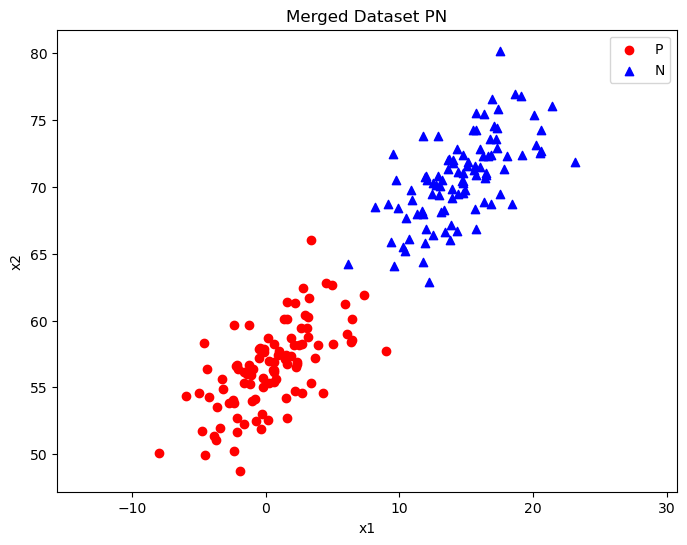

In [10]:
# Plot merged dataset PN
plt.figure(figsize=(8,6))

# Plot P points
plt.scatter(PN[PN['target']=='P']['x1'], 
            PN[PN['target']=='P']['x2'], 
            color='red', marker='o', label='P')

# Plot N points
plt.scatter(PN[PN['target']=='N']['x1'], 
            PN[PN['target']=='N']['x2'], 
            color='blue', marker='^', label='N')

plt.title("Merged Dataset PN")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.legend()
plt.show()

# PART III

## Simple Classifier

Classifier SimpleClassifier:
Given data D(x1, x2, target),<br>
If x1 + x2 > median, then predicted class:<br>
...    <b>N</b><br>
Else<br>
...    <b>P</b>

Obtain predicted class labels of the dataset PN using SimpleClassifier:

Print output Y(x1,x2,True_Target, Predicted_Target)

Plot output Y. Use the same marker shape. Predicted Target colors: P in Red and N in blue. Zoom in to show miss classified data points as needed.

Obtain the Confusion Matrix and print:

Claculate the Performance Scores of Accuracy, Recall (Sensitivity), Specificity, F1-score. Plot as bar-chart:

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.